In [1]:
import pandas as pd
from geocode import latlon, NoResultError 

df = pd.read_csv("tatorter.txt", header=None)
df.columns = ['town']

def add_coordinate(row):
    try:
        return latlon('{}, Sverige'.format(row['town']))
    except NoResultError:
        return None
    
df = df.drop_duplicates('town')
df['coordinate'] = df.apply(add_coordinate, axis=1)

In [2]:
def lat(x):
    try:
        return x[0]
    except:
        return None
    
def lon(x):
    try:
        return x[1]
    except:
        return None

df['lat'] = df['coordinate'].map(lat)
df['lon'] = df['coordinate'].map(lon)

df = df.dropna(axis=0) # Remove without coordinate
df = df[['town', 'lat', 'lon']]

In [ ]:
def find_features(s):
    feats = [s[i:i+7] for i in xrange(len(s)-6)] 
    feats += [s[i:i+6] for i in xrange(len(s)-5)] 
    feats += [s[i:i+5] for i in xrange(len(s)-4)] 
    feats += [s[i:i+4] for i in xrange(len(s)-3)] 
    feats += [s[i:i+3] for i in xrange(len(s)-2)] 
    return feats

features = []
for town in df['town'].values:
    features.extend(find_features(town.lower()))

features = list(set(features))

final_features = []
occurances = []
for feature in features:
    try:
        occurances.append(sum(df['town'].str.contains(feature)))
        final_features.append(feature)
    except:
        pass
    
df_features = pd.DataFrame({'feature': final_features, 
                            'occurances': occurances })

In [23]:
for suff in df_features.sort('occurances', ascending=False).head(100)['feature'].values:
    print suff

sta
äs
jö
ing
är
tor
erg
ors
nge
orp
vik
torp
ber
berg
und
and
fors
for
sj�
sjö
äl
nä
rö
ör
olm
näs
tad
stad
hol
holm
inge
ån
ter
lö
str
ås
tra
mar
öd
ers
ngs
lle
ung
ra 
dal
all
ham
ste
öv
sto
än
stor
ång
lst
lla
�ng
storp
stra
äll
�ll
sby
red
arp
ster
ryd
est
jä
nda
rå
mma
bro
ill
äst
ken
�st
ön
ran
sund
år
ult
sun
rä
lin
Ös
eby
nga
tr�
rst
öl
den
Öst
�st
ling
bru
nna
lan
rby
löv
nne
ger


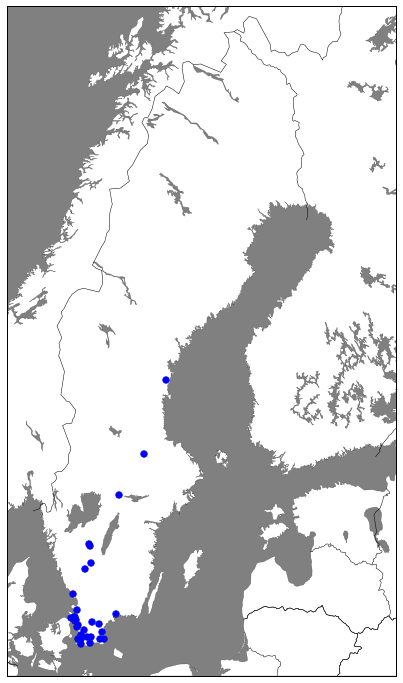

In [27]:
townpart = 'arp'

def get_coordinates(townpart):
    return df[df['town'].str.contains(townpart)]['lat'].values, df[df['town'].str.contains(townpart)]['lon'].values
    
lats, lons = get_coordinates(townpart)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(16, 12), dpi=150)

llcrnrlon = 9.5
llcrnrlat = 54.5
urcrnrlon = 28.5
urcrnrlat = 69.5
resolution = 'i'
area_thresh = 250

m = Basemap(projection='merc',
            resolution=resolution, 
            area_thresh=area_thresh,
            llcrnrlon=llcrnrlon, 
            llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, 
            urcrnrlat=urcrnrlat) 

m.drawcoastlines(linewidth=0.25, color="#3b3b3b") 
m.drawcountries()
m.drawstates()
m.drawmapboundary()
m.fillcontinents(color='white', lake_color='grey', zorder=0)
m.drawmapboundary(fill_color='grey')

x, y = m(lons,lats)
m.scatter(x, y, marker='o', color='b', s=40)